In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [3]:
!ls ../tmp/transformed/

features.pickle           profile.csv               profile_with_testflag.csv


In [4]:
ewad_dir = '../tmp/transformed/'

In [43]:
with open(ewad_dir+'features.pickle', mode='br') as fi:
    dic_features = pickle.load(fi)

In [44]:
len(dic_features)

17

In [45]:
dic_features.keys()

dict_keys(['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1', 'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP', 'SE'])

In [46]:
dic_features['PS1']

,id,time,PS1
0,0,0,151.47
1,0,1,151.45
2,0,2,151.52
3,0,3,151.27
4,0,4,150.80
...,...,...,...
13229995,2204,5995,151.64
13229996,2204,5996,151.70
13229997,2204,5997,151.73
13229998,2204,5998,151.71


- id: オブザーベーション
- time: 時間変数
- PS1（センサー名）: センサー値

In [47]:
use_sensors = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6']

In [48]:
y_min = dict()
y_max = dict()

for ps in use_sensors:
    print(ps)
    print(dic_features[ps].shape)
    y_min[ps] = dic_features[ps][ps].min()
    y_max[ps] = dic_features[ps][ps].max()
    print(y_min[ps], y_max[ps])

PS1
(13230000, 3)
133.13 191.92
PS2
(13230000, 3)
0.0 167.77
PS3
(13230000, 3)
0.0 18.828
PS4
(13230000, 3)
0.0 10.266
PS5
(13230000, 3)
8.318 10.041
PS6
(13230000, 3)
8.268 9.91


In [49]:
y_min, y_max

({'PS1': 133.13,
  'PS2': 0.0,
  'PS3': 0.0,
  'PS4': 0.0,
  'PS5': 8.318,
  'PS6': 8.268},
 {'PS1': 191.92,
  'PS2': 167.77,
  'PS3': 18.828,
  'PS4': 10.266,
  'PS5': 10.041,
  'PS6': 9.91})

'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6'の値を、オブザベーション別に、縦積みで時系列プロットする

(6000, 3) (6000, 3) (6000, 3) (6000, 3) (6000, 3)


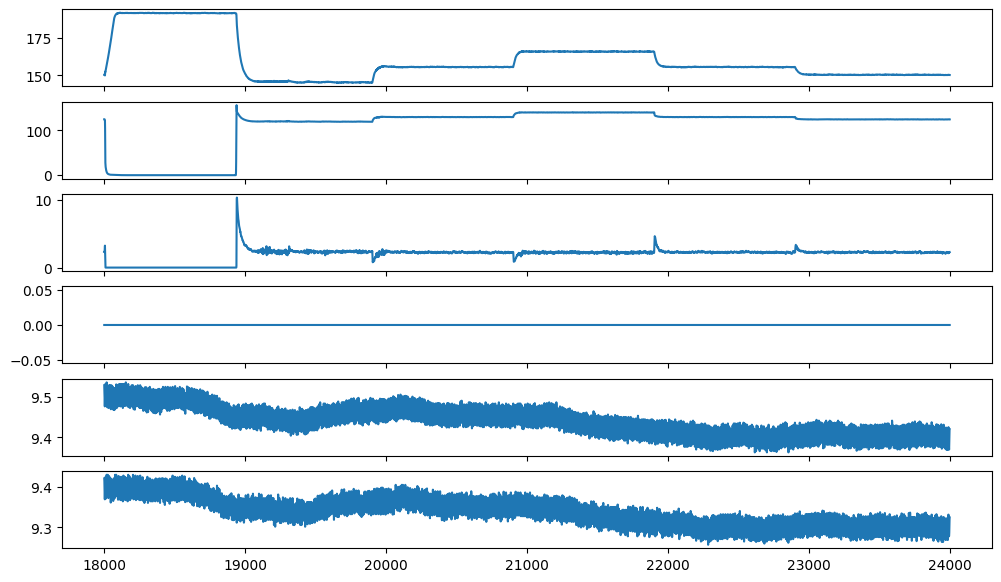

In [59]:
obs_id = 3

d1 = dic_features['PS1'][dic_features['PS1']['id'] == obs_id]
d2 = dic_features['PS2'][dic_features['PS2']['id'] == obs_id]
d3 = dic_features['PS3'][dic_features['PS3']['id'] == obs_id]
d4 = dic_features['PS4'][dic_features['PS4']['id'] == obs_id]
d5 = dic_features['PS5'][dic_features['PS5']['id'] == obs_id]
d6 = dic_features['PS6'][dic_features['PS6']['id'] == obs_id]

print(d1.shape, d2.shape, d3.shape, d4.shape, d5.shape, )

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 7), sharex=True)
d1['PS1'].plot(ax=axes[0])#, title='PS1')
#axes[0].set_ylim(y_min['PS1'], y_max['PS1'])    # 範囲を指定する場合
#axes[0].set_yticklabels([])    # 縦軸の目盛りラベルを消す
#axes[0].set_xticklabels([])  # 横軸の目盛りラベルを消す
d2['PS2'].plot(ax=axes[1])#, title='PS2')
#axes[1].set_ylim(y_min['PS2'], y_max['PS2'])
d3['PS3'].plot(ax=axes[2])#, title='PS3')
#axes[2].set_ylim(y_min['PS3'], y_max['PS3'])
d4['PS4'].plot(ax=axes[3])#, title='PS5')
#axes[3].set_ylim(y_min['PS4'], y_max['PS4'])
d5['PS5'].plot(ax=axes[4])#, title='PS5')
#axes[4].set_ylim(y_min['PS5'], y_max['PS5'])
d6['PS6'].plot(ax=axes[5])#, title='PS6')
#axes[5].set_ylim(y_min['PS6'], y_max['PS6'])
#plt.tight_layout()

plt.savefig('sample_plt.jpg', format='jpg')
plt.show()

In [63]:
!ls tmp

out_imgs


In [71]:
out_dir = 'tmp/out_imgs/'

n_obs = 2205
#n_obs = 10   # test

for i in tqdm(range(n_obs)):
    obs_id = i
    d1 = dic_features['PS1'][dic_features['PS1']['id'] == obs_id]
    d2 = dic_features['PS2'][dic_features['PS2']['id'] == obs_id]
    d3 = dic_features['PS3'][dic_features['PS3']['id'] == obs_id]
    d4 = dic_features['PS4'][dic_features['PS4']['id'] == obs_id]
    d5 = dic_features['PS5'][dic_features['PS5']['id'] == obs_id]
    d6 = dic_features['PS6'][dic_features['PS6']['id'] == obs_id]

    #print(i, d1.shape, d2.shape, d3.shape, d4.shape, d5.shape, )

    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 7), sharex=True)
    d1['PS1'].plot(ax=axes[0])
    d2['PS2'].plot(ax=axes[1])
    d3['PS3'].plot(ax=axes[2])
    d4['PS4'].plot(ax=axes[3])
    d5['PS5'].plot(ax=axes[4])
    d6['PS6'].plot(ax=axes[5])

    plt.savefig(f'{out_dir}{i}.jpg', format='jpg')
    plt.close()

100%|██████████| 2205/2205 [1:29:47<00:00,  2.44s/it]
